# Comprehensive Vertex AI Tutorial For Beginners

## Introduction

Even though most people associate search engines with Google, the company has deep roots in the data science industry. It consistently delivers state-of-the-art products and solutions aimed at getting the most benefit from data. One of their products, Vertex AI, was released in 2021 to simplify the machine learning process at enterprise scale.

In this tutorial, we will learn how to get started with Google's Vertex AI platform and how to use it to cover a wider range of tasks of the ML life cycle. We will leave with a deployed model we can send requests to generate predictions for a classification task. 

## What is Vertex AI?

A typical machine learning life cycle consists of many stages:

- Data preparation, ingestion, exploration
- Feature engineering, selection
- Model training and tuning
- Deploying and model monitoring

All these stages and sub-stages require different set of tools and diverse team of experts to coordinate them. Vertex AI by Google Cloud streamlines and unifies this entire process into a single platform.

While large-scale ML applications require seasoned specialists, Vertex AI empowers users of any skill level:
- __AutoML for beginners__: Requires no coding experience! Simply feed your data and with a few clicks, AutoML generates a high quality model for you. All the heavy lifting of data preparation, model building including algorithm selection and hyperparameter tuning is performed under the hood.
- __Custom model training for experts__: Your experience is the limit. For experienced data scientists and ML engineers, Vertex AI provides the flexibility to train models using their preferred framework such as PyTorch, TensorFlow or XGBoost.
- __Deployment for everyone__: Once you have a model trained by either AutoML or a custom one, Vertex AI makes deploying them a breeze. You can publish models as real-time APIs to integrate into your products or use batch-prediction for large-scale tasks.

There are many things we aren't mentioning in this section, as you will get to work on most of them yourself in this tutorial. 

## What are Google Cloud Services?

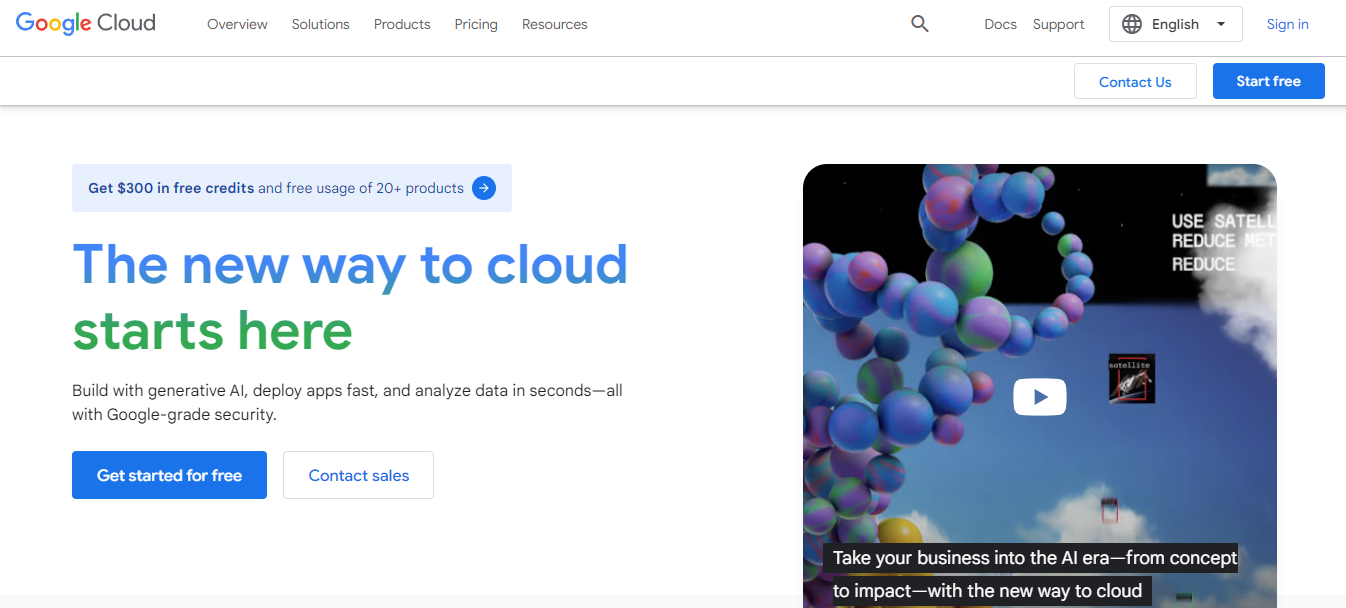

Before we start exploring the platform, we need to mention its parent - Google Cloud services. Google Cloud Services includes a wide range of cloud computing solutions that provide storage, networking, databases, analytics, and machine learning capabilities. These services work together in sync with Vertex AI to unify your machine learning workflow. Here's a breakdown of the services often used with Vertex AI:

__Data storage and management__
- __Cloud storage__: Acts as the central repository for your raw data, accessible by Vertex AI for training and analysis.
- __BigQuery__: A powerful data warehouse for storing and querying large datasets, enabling Vertex AI to use BigQuery ML for in-suit training.

__Compute Resources__:

- __Compute Engine__: Provides virtual machines with various configurations for your custom model training needs. Vertex AI can hook up to these machines for resource-intensive training tasks.
- __Vertex AI Pipelines__: Coordinates complex ML workflows across various compute resources for efficiency. 


Google Cloud services are always available from your Google Account if you visit cloud.google.com. If you have never used them before, click "Get started for free" to earn your free trail. Otherwise, you can directly go to console.cloud.google.com so that we can get started.

## Setting up your Google Cloud Console For Vertex AI

When you visit your Google Cloud Console, you will most likely end up on the following welcome page:

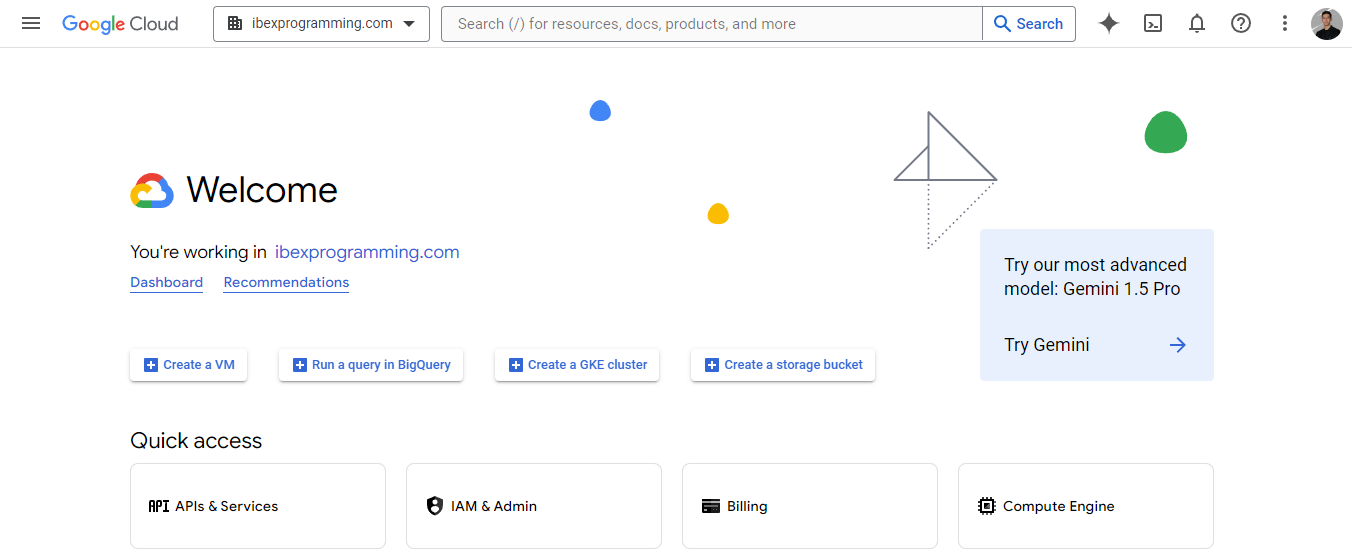

It lists your workspace name, mine is `ibexprogramming.com`. 

The first thing we will do is to create a project. Google Cloud projects are high-level organization units to manage resources for a specific problem. Here is a GIF on how to create one:

![](images/create_project.gif)

Once you are notified that the project has been created, select it so that the top bar of the page shows this:

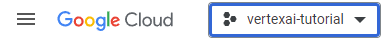

Now, you need to create a billing account because Vertex AI requires billing information to enable you its services. Don't worry - you won't be charged until you use paid resources. So, head over to https://console.cloud.google.com/billing:

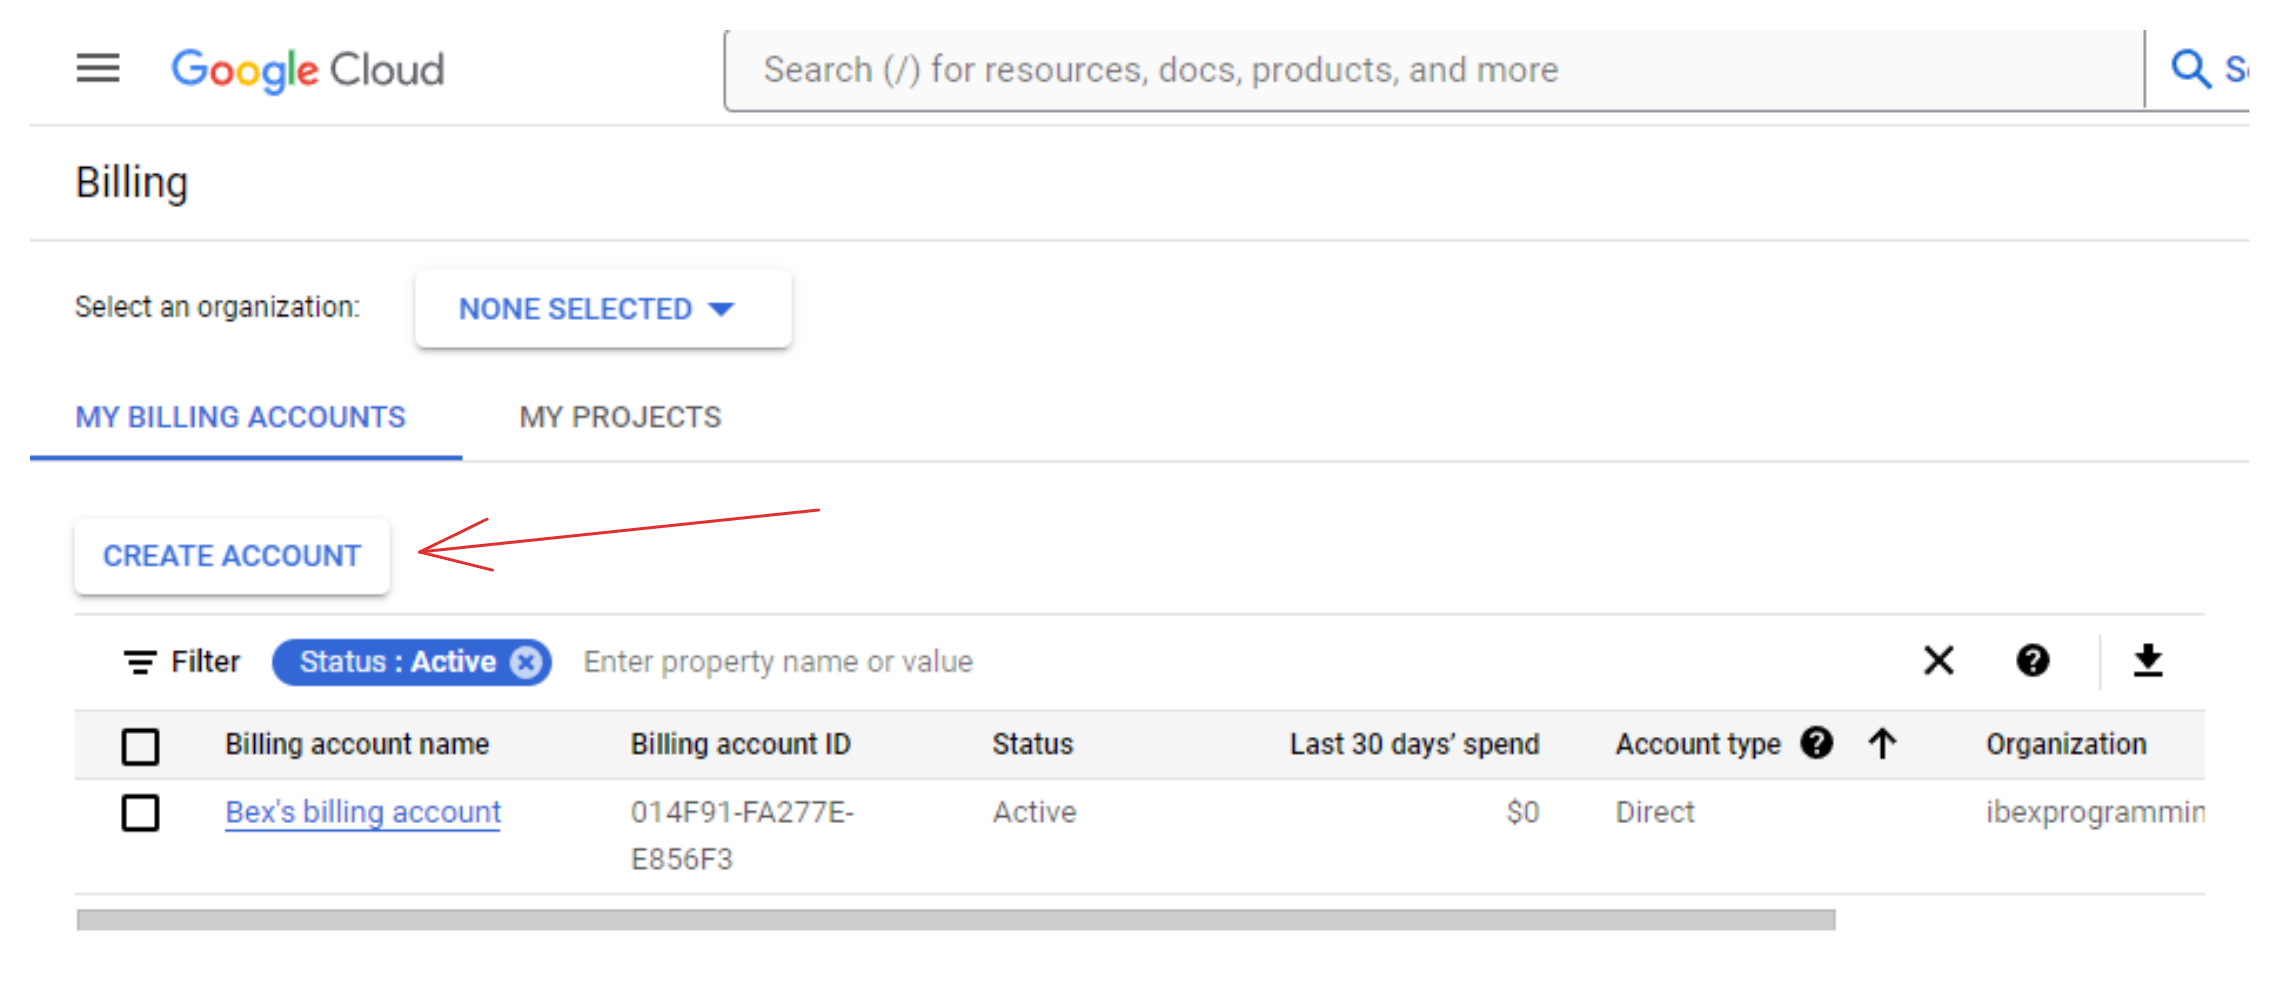

If you don't already have an account like mine, click on "Create account" and follow the instructions shown. We will link this billing account to ours in the next section.

Afterward, go back to https://console.cloud.google.com/ and click on "View all products" button at the bottom of the page:

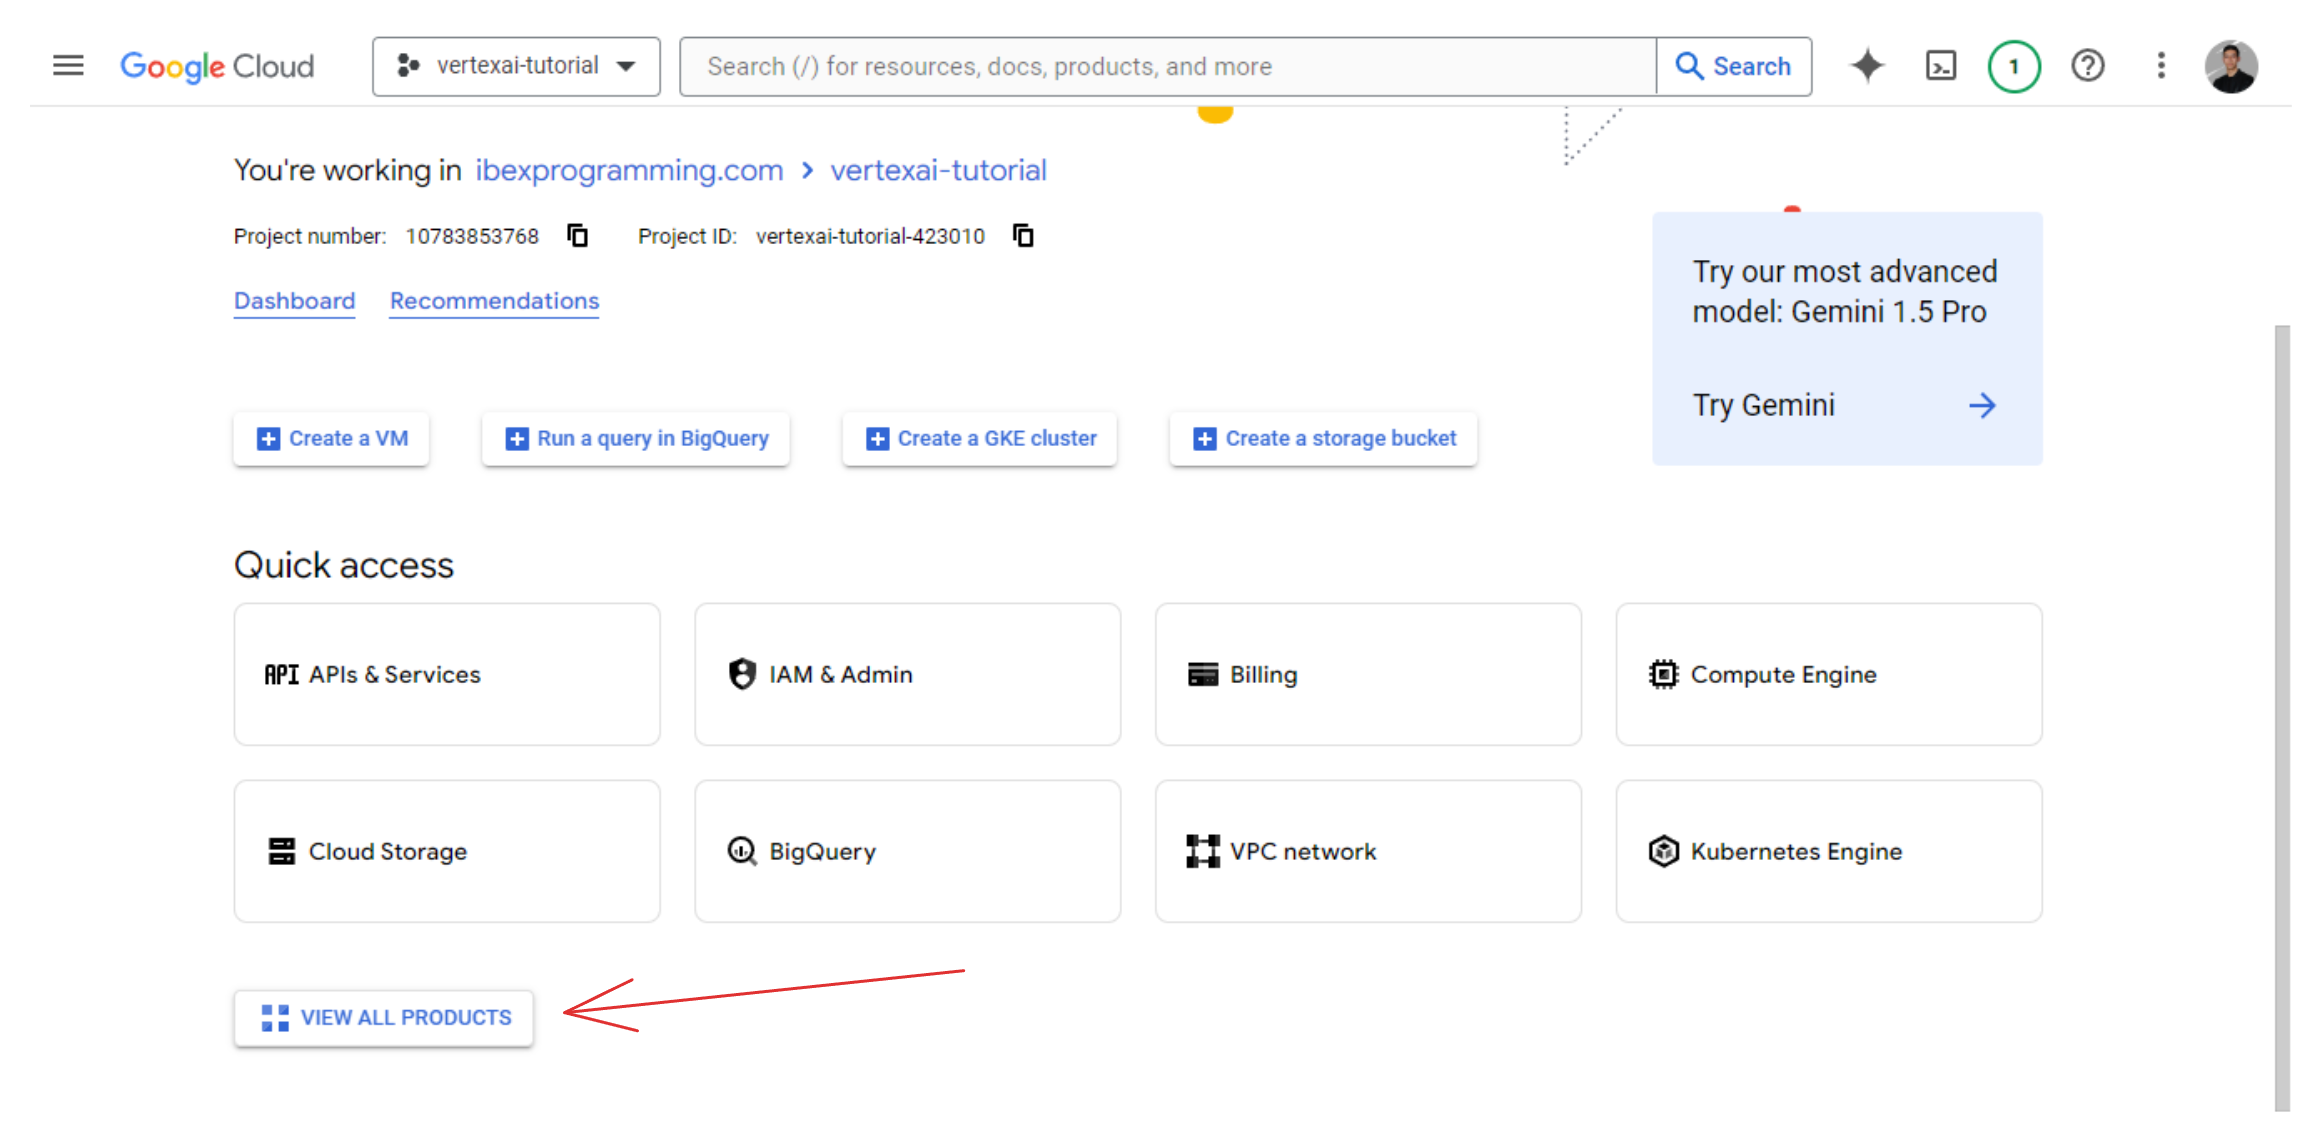

The next page will list all the services offered by Google Cloud for your project. Search for "Vertex AI" (Ctrl + F) and pin it to your menu for easy access. Then, click on the service itself:

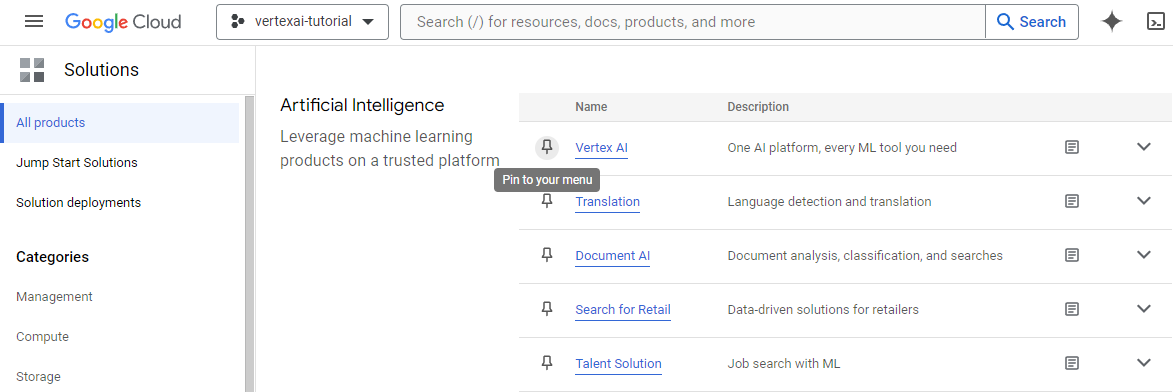

This will direct you to your Vertex AI dashboard located at https://console.cloud.google.com/vertex-ai. A window may pop up asking you to enable Vertex AI API - choose "Enable". If the window doesn't pop up you can click on "Enable all API permissions" button to do the same.

Now, we are ready to upload a dataset to Vertex AI.

## Uploading a dataset in Vertex AI

There are a variety of ways of uploading a dataset to Vertex AI. In this section, we will use a local CSV for simplicity.  

### Download a sample dataset

For the article, we will be using the [Dry Bean dataset](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset) from the UCI Machine Learning repository. It contains 13k instances of beans and their 16 numeric measurements. The task is to classify them into seven types of beans: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira.

After downloading, save the Excel file inside the downloaded ZIP to your local directory:

In [1]:
from pathlib import Path

cwd = Path.cwd()
data_path = cwd / "data" / "Dry_Bean_Dataset.xlsx"

Then, we can read this file with Pandas and save it back as a CSV:

In [2]:
import pandas as pd

beans = pd.read_excel(data_path)

beans.shape

(13611, 17)

> Note that `read_excel` function requires you to install the `openpyxl` library with PIP.

Great, we have the dataset as a DataFrame. Let's save it back as a CSV:

In [3]:
beans.to_csv(cwd / "data" / "dry_bean.csv", index=False)

### Create a Cloud Storage Bucket

Like we mentioned earlier, we need a Google Storage Bucket to store our raw data. Follow the GIF below to navigate to the product's dashboard:

![](images/enable_billing.gif)

The GIF shows that to start using storage services, we need to link a billing account, which we do using the one we created earlier. Then, you will be able to create a bucket with a globally unique name:

![](images/create_bucket.gif)

Once you find a unique name, click "Continue" until the bucket is created - you can choose default options for all fields. 

Now, we are ready to ingest the CSV file we've saved in the previous section.

### Ingest a local CSV into Vertex AI

Now, let's move back to our Vertex AI dashboard and check out the datasets tab:

![](images/datasets_tab.gif)

You will find it empty, so click on "+Create" button:

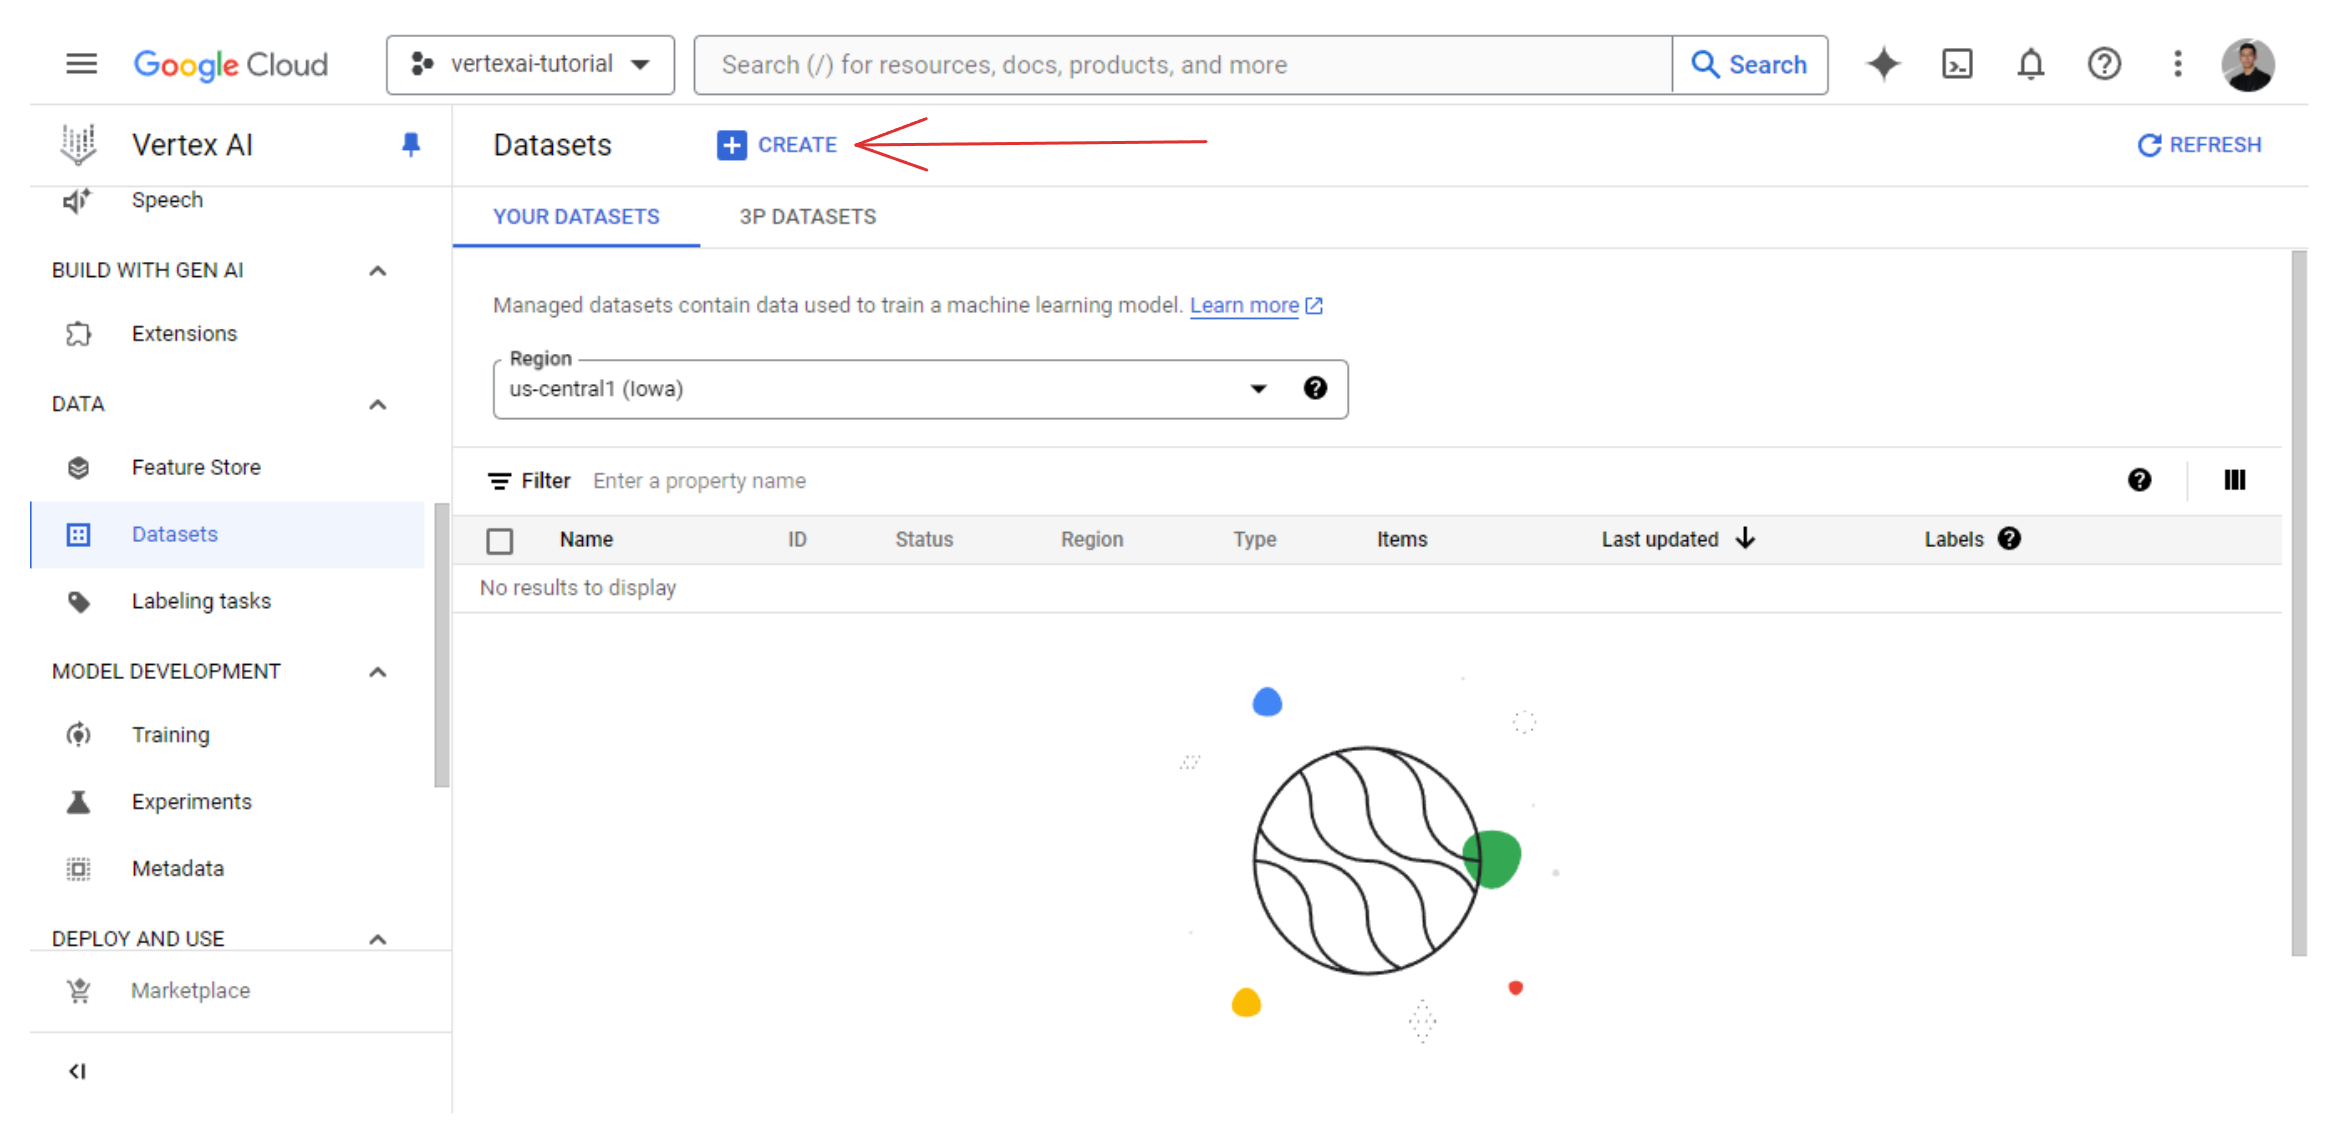

Give the dataset a unique name and choose the tabular option:

![](images/create_dataset.gif)

Then, the platform shows you source options. Choose to upload a local CSV file and for the Cloud Storage path, choose the bucket you just created:

![](images/upload_csv.gif)

Once the dataset is successfully uploaded, you will be shown the "Analyze" tab, which shows basic metadata about the CSV file. You will also see a "TRAIN NEW MODEL" button which will launch an AutoML training job. 

However, we won't be using that button as that's for complete ML beginners. Instead, we will be using Vertex AI Workbench to configure a Jupyterlab coding environment and compute resources to run both AutoML and custom libraries. 

## Configuring Jupyterlab and compute resources in Vertex AI Workbench

Since Vertex AI is a unified platform, it also offers development environments called _workbenches_. To create a workbench, go to its own tab and follow the instructions in the GIF below:

![](images/create_workbench.gif)

Each workbench comes with Jupyterlab 3 pre-installed. So, you only have to configure the hardware options based on your budget and needs. Since we have a pretty small dataset, I chose the weakest instance for illustration, which costs only ~0.12$ an hour (I recommend changing a machine with more CPU cores to make computations faster). I also changed the idle shutdown duration to 10 minutes so that the environment automatically stops if I forget to switch it off. 

The workbench will take some time to initialize. Once it does, "OPEN JUPYTERLAB" button appears and we click on it:

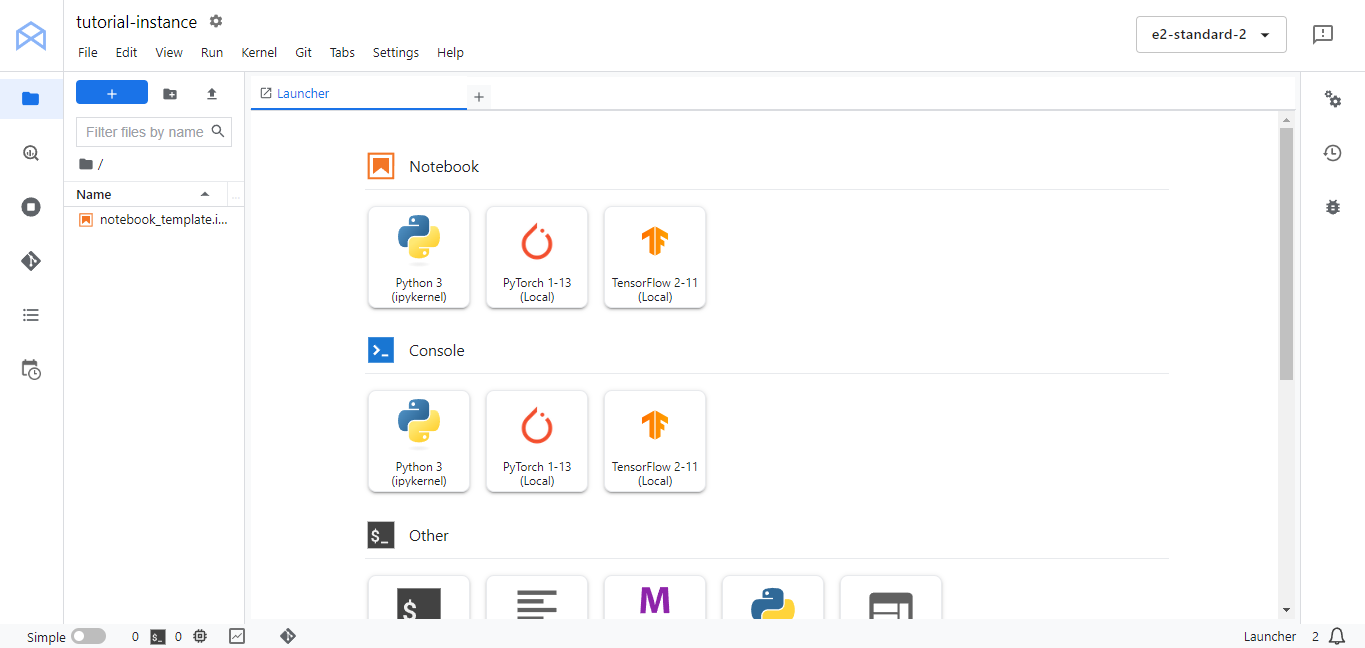

We will be directed to the familiar Jupyterlab interface. From there, create a new Python 3 notebook and rename it to whatever you want. In the first cell, install/upgrade Google Cloud services SDK `google-cloud-aiplatform`:

```bash
!pip3 install --upgrade --quiet google-cloud-aiplatform


```

Then, you can list the projects available under your account with `gcloud config list`:

```bash
!gcloud config list
```

```bash
[compute]
region = us-central1
[core]
account = # HIDDEN #
disable_usage_reporting = True
project = vertexai-tutorial-423010
[dataproc]
region = us-central1

Your active configuration is: [default]
```

> `gcloud` and `gsutil` are both terminal utilities available in all workbenches. They allow you to manage your Google Cloud services efficiently.

From the printed output, save the following information as variables:

```python
PROJECT_ID = 'vertexai-tutorial-423010'
BUCKET_URI = 'gs://vetex-tutorial-bucket-bex'
REGION = 'us-central1'
```

Don't forget to change `BUCKET_URI` to your own bucket name. Then, import the `aiplatform` sub-module and initialize it:

```PYTHON
from google.cloud import aiplatform as ai

ai.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)
```

`aiplatform` will serve as an SDK to interact with Vertex AI features. 

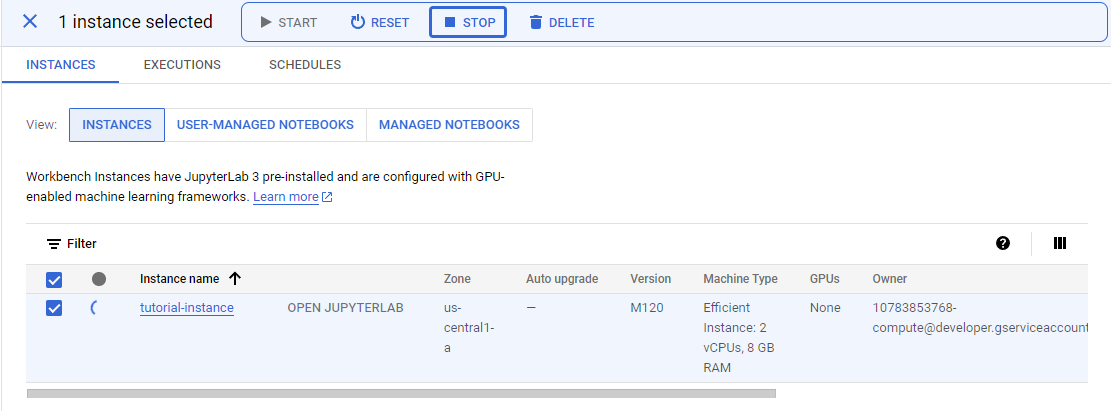

When you finish following the tutorial or take a break, don't forget to STOP the instance to stop incurring costs. 

## Training and deploying AutoML models in Vertex AI

Now, let's train a model with AutoML, which as we mentioned earlier, takes care of all the heavy lifting for us and returns the best model it could train for the given dataset. This means that to fully take advantage of AutoML, you must ensure the dataset you are feeding to is as high-quality as possible. So, it is worth taking some time to engineer new features and perform any preprocessing steps beforehand. AutoML preprocesses dataset internally but it can't fix all the issues with your dataset. 

In this section, we will only train a baseline AutoML model with no preprocessing or feature engineering. The dataset is fairly clean already. 

### Loading data from a Google Storage bucket

The first thing we want to do is load the CSV dataset from our bucket and spend some time on exploring it. Remember, [EDA cannot be ignored](https://www.datacamp.com/courses/exploratory-data-analysis-in-python)!

In [9]:
import pandas as pd

# Path to your CSV file in GCS bucket
gcs_path = "gs://vertex-tutorial-bucket-bex/dry_bean.csv"

beans = pd.read_csv(gcs_path)

beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


The good news is that Pandas can load files from GCS paths. The only catch is that the above code only works in Vertex AI workbenches as they are already authenticated with your credentials.

### Exploring data with Pandas

We won't perform deep analysis of the dataset as it will distract us from the main point of the article. So, we will contend with printing a few summary statistics and charts:

In [10]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

So, there are 15 numeric features and a single target column - `Class`. There are only ~13k records and no missing values. This will simplify training by a lot.

Let's save feature names into a separate list as we might need them later:

In [ ]:
feature_names = beans.columns.tolist()

Now, let's create a pair-plot of a few features that seem important:

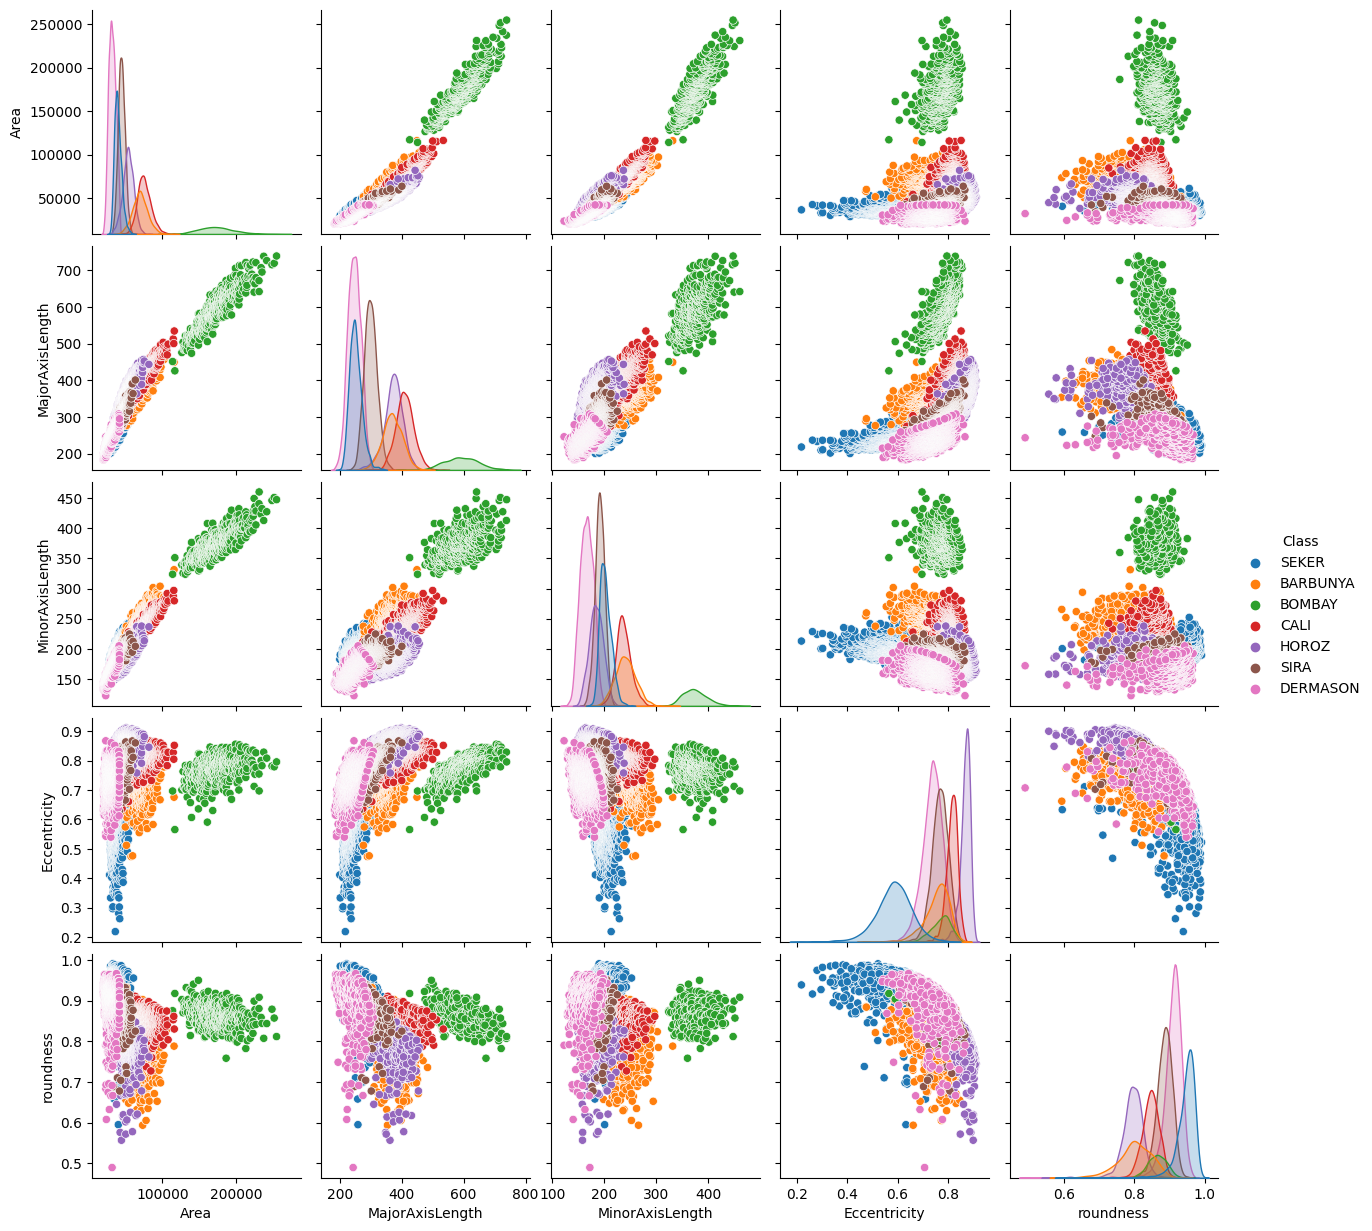

In [12]:
import seaborn as sns

sns.pairplot(
    beans,
    vars=["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "roundness"],
    hue="Class",
);

We see a few interesting trends - mainly, it seems that Bombay (green) beans are clearly separated from the others in their physical measurements.

Let's also plot a correlation matrix:

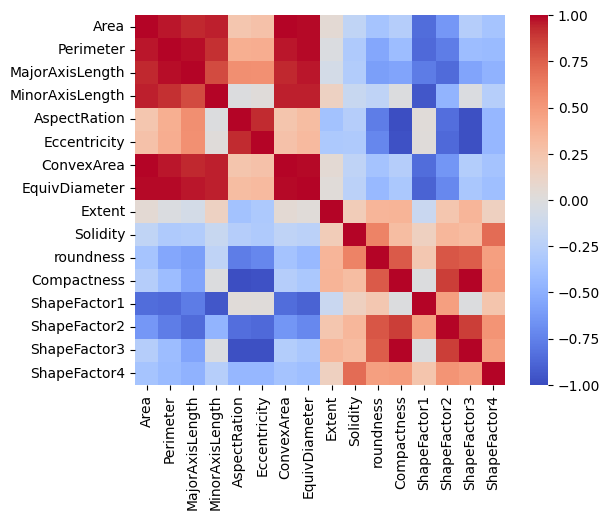

In [15]:
import matplotlib.pyplot as plt

correlation = beans.corr(numeric_only=True)

# Create a square heatmap with center at 0
sns.heatmap(correlation, center=0, square=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.show()

We have a few features almost perfectly correlated and that makes sense as they are related to physical measurements. However, we also have a few feature pairs that show no or very little correlation.

At this point, I will leave it to you to continue this exploration and try to find some questions to answer about the dataset.

### Running an AutoML training job

To start an AutoML training job, we first need a dataset object compatible with it:

In [21]:
ds = dataset = ai.TabularDataset.create(
    display_name="dry_bean_dataset", gcs_source=gcs_path
)

Creating TabularDataset
Create TabularDataset backing LRO: projects/10783853768/locations/us-central1/datasets/4978116960081412096/operations/351205488748134400
TabularDataset created. Resource name: projects/10783853768/locations/us-central1/datasets/4978116960081412096
To use this TabularDataset in another session:
ds = aiplatform.TabularDataset('projects/10783853768/locations/us-central1/datasets/4978116960081412096')


In [22]:
type(ds)

google.cloud.aiplatform.datasets.tabular_dataset.TabularDataset

In [24]:
ds.resource_name

'projects/10783853768/locations/us-central1/datasets/4978116960081412096'

We use the `TabularDataset.create` method to initialize it as `ds`. Vertex AI assigns it its own name, which is accessible through its `resource_name` attribute. Now, we initialize the job with `ai.AutoMLTabularTrainingJob` class. It requires two arguments:
- A display name for the job
- The objective of the task - classification, in this case.

Now, we will call the job's `run` method:

In [ ]:
model = job.run(
    dataset=ds,
    target_column="Class",
    training_fraction_split=0.8,
    validation_fraction_split=0.1,
    test_fraction_split=0.1,
    model_display_name="baseline-classification-model",
    disable_early_stopping=False,
)

The method's parameters are fairly self-explanatory. The code will take some time to finish execution (depends on your compute power). 

If you go to the "MODEL DEVELOPMENT > TRAINING" tab of your dashboard and click on the job name, you will see live training progress. The image below shows that the training is in the preprocessing stage:

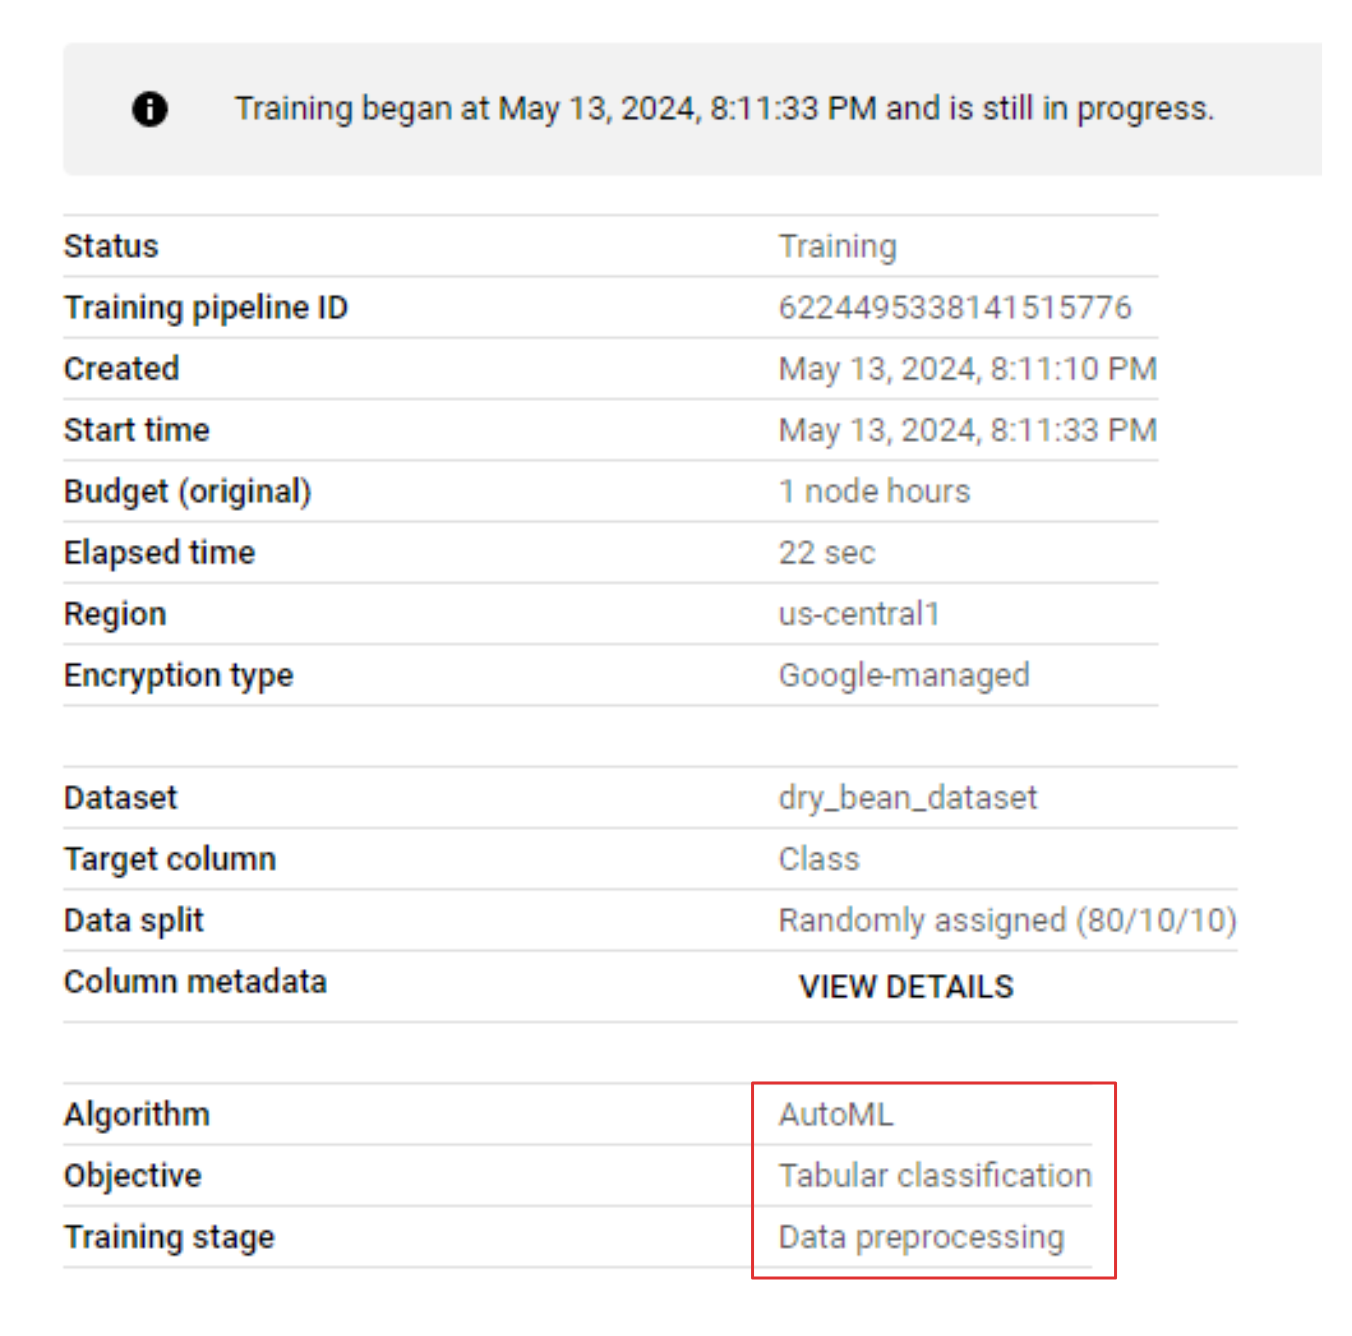

### Looking at results

Once training finishes, go the training tab again and click on the model name. This time, there will be performance metrics listed alongside the model:

![](images/results.gif)

As you can see, even for a baseline model, we have very good metrics, all above 0.90. 

### Deploying an AutoML model and generating predictions

We can now deploy this `model` with a single line of code:

In [ ]:
endpoint = model.deploy(machine_type="n1-standard-4")

The `deploy` method requires only a single argument - the type of machine to run inference. I won't actually run the above line as deploying incurs additionally costs for as long as the model is online. 

The `deploy` method returns an `Endpoint` object we can send requests to:

In [ ]:
prediction = endpoint.predict(
    [
        {
            "Area": "30099",
            "Perimeter": "638.8209999999999",
            "MajorAxisLength": "237.14191130827916",
            "MinorAxisLength": "162.3034300714102",
            "AspectRation": "1.4611022774068396",
            "Eccentricity": "0.7290928631259719",
            "ConvexArea": "30477",
            "EquivDiameter": "195.76321681302556",
            "Extent": "0.8036043251902283",
            "Solidity": "0.9875972044492568",
            "roundness": "0.9268374259664279",
            "Compactness": "0.8255108332939839",
            "ShapeFactor1": "0.007878730566074592",
            "ShapeFactor2": "0.002256976927384019",
            "ShapeFactor3": "0.6814681358857279",
            "ShapeFactor4": "0.9956946453228307",
        }
    ]
)

print(prediction)

It has a `predict` method that accepts a list of samples to predict. The samples must be given in JSON format. 

You can also use the dashboard to deploy. If you go the "MODEL REGISTRY" tab, you will see the model listed there. Click on its name and choose the "DEPLOY & TEST" tab:

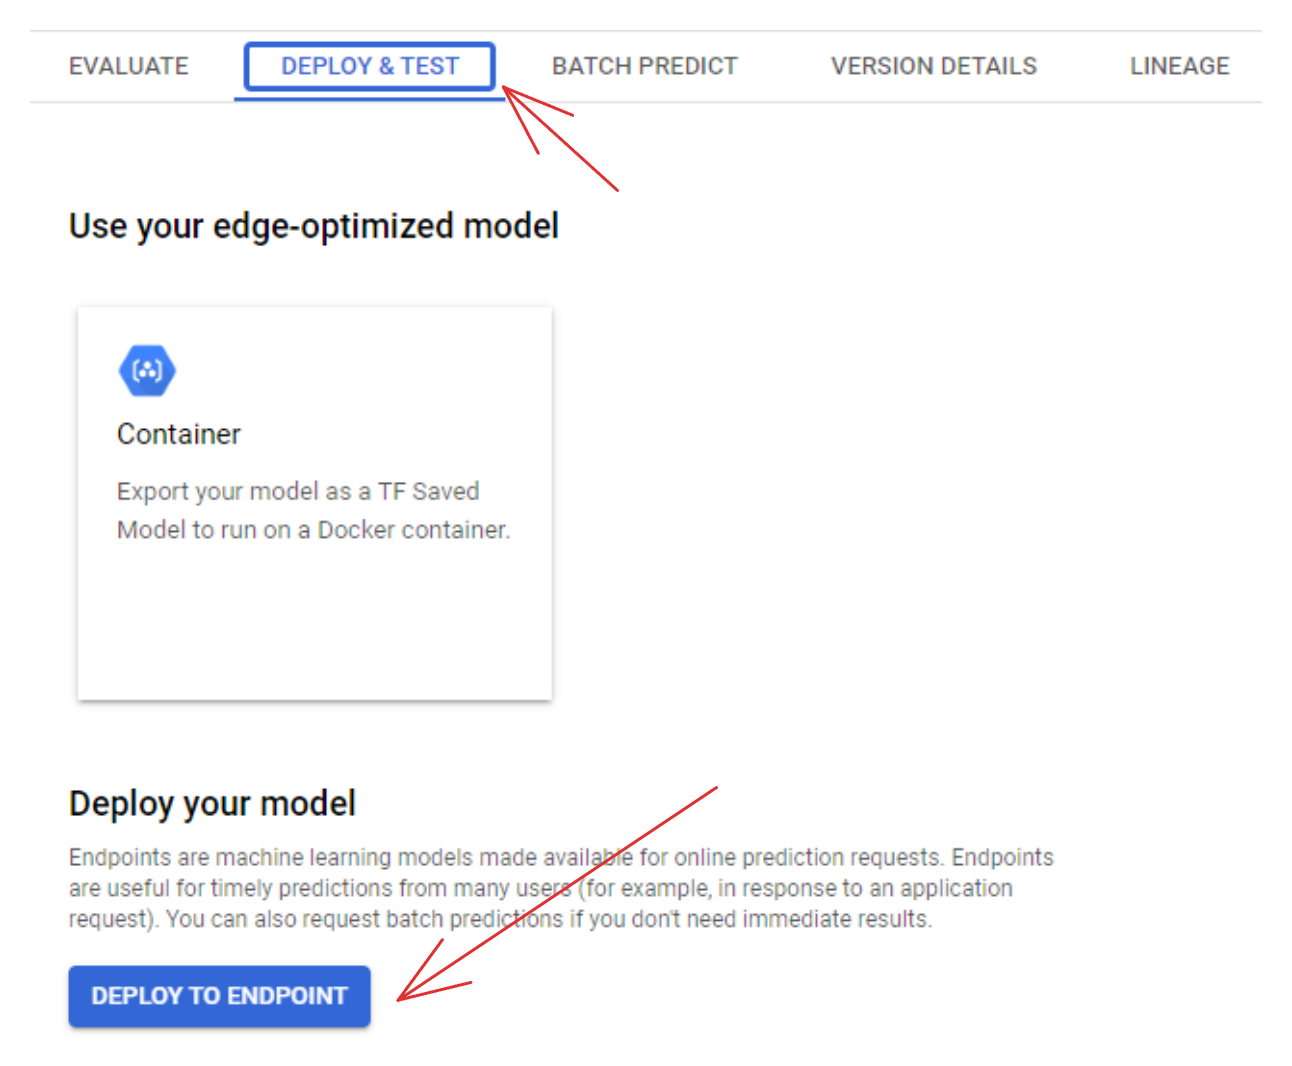

Clicking on the 'DEPLOY TO AN ENDPOINT' button takes you to a separate page where you can configure the machine to deploy your model. But before you do that, you can test it below the deployment button:

![](images/test.gif)

## Training and deploying custom models in Vertex AI

## Conclusion